<h2><center>TASK-2

**Task-2**:Iris Flower Classification  
**Domain**:DataScience  
**Batch** :August(Batch-3)

**Aim**:To develop a model that can classify iris flowers into different species based on their sepal and petal measurements.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [64]:
iris=pd.read_csv("iris flower classification.csv")

In [65]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Statistical Analysis about the data

In [67]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
iris.shape

(150, 5)

In [69]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [71]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:>

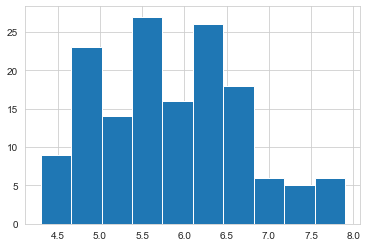

In [72]:
iris['sepal_length'].hist()

<AxesSubplot:>

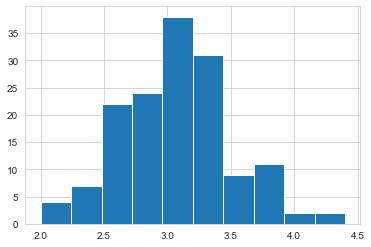

In [73]:
iris['sepal_width'].hist()

<AxesSubplot:>

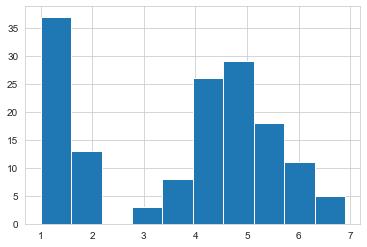

In [74]:
iris['petal_length'].hist()

<AxesSubplot:>

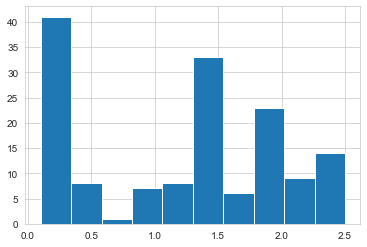

In [75]:
iris['petal_width'].hist()

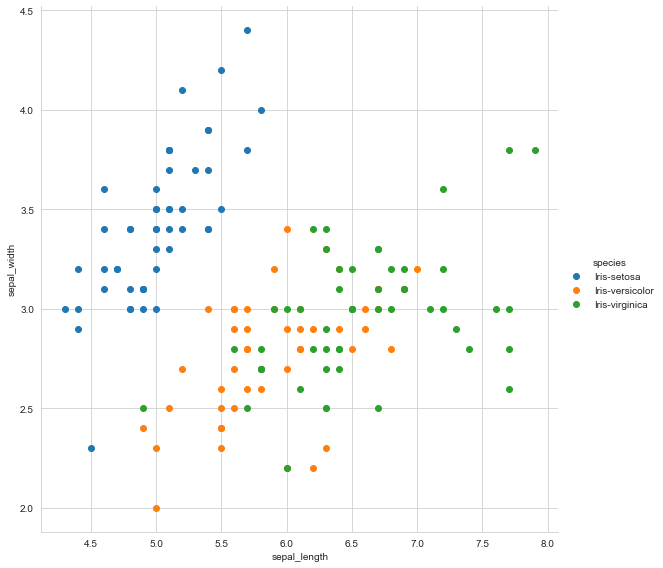

In [76]:
##scatter plot
sns.set_style("whitegrid");
g=sns.FacetGrid(iris,hue="species",height=8)
g.map(plt.scatter,"sepal_length","sepal_width")
g.add_legend();
plt.show();

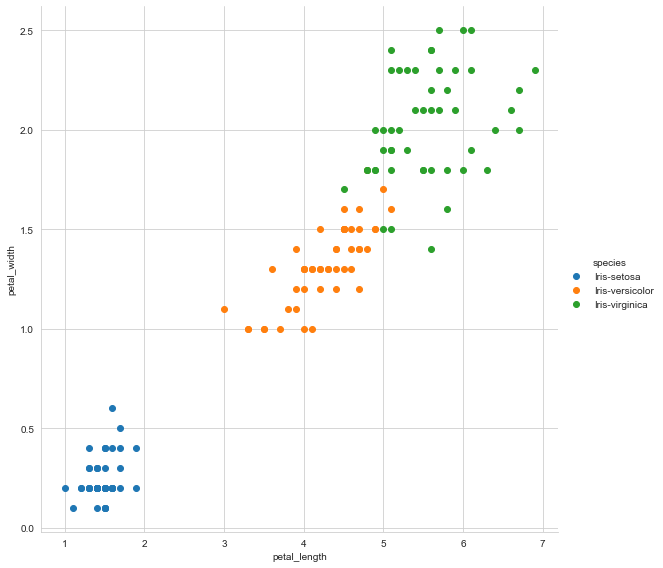

In [77]:
sns.set_style("whitegrid");
g=sns.FacetGrid(iris,hue="species",height=8)
g.map(plt.scatter,"petal_length","petal_width")
g.add_legend();
plt.show();

___Data Visualization of the whole data___

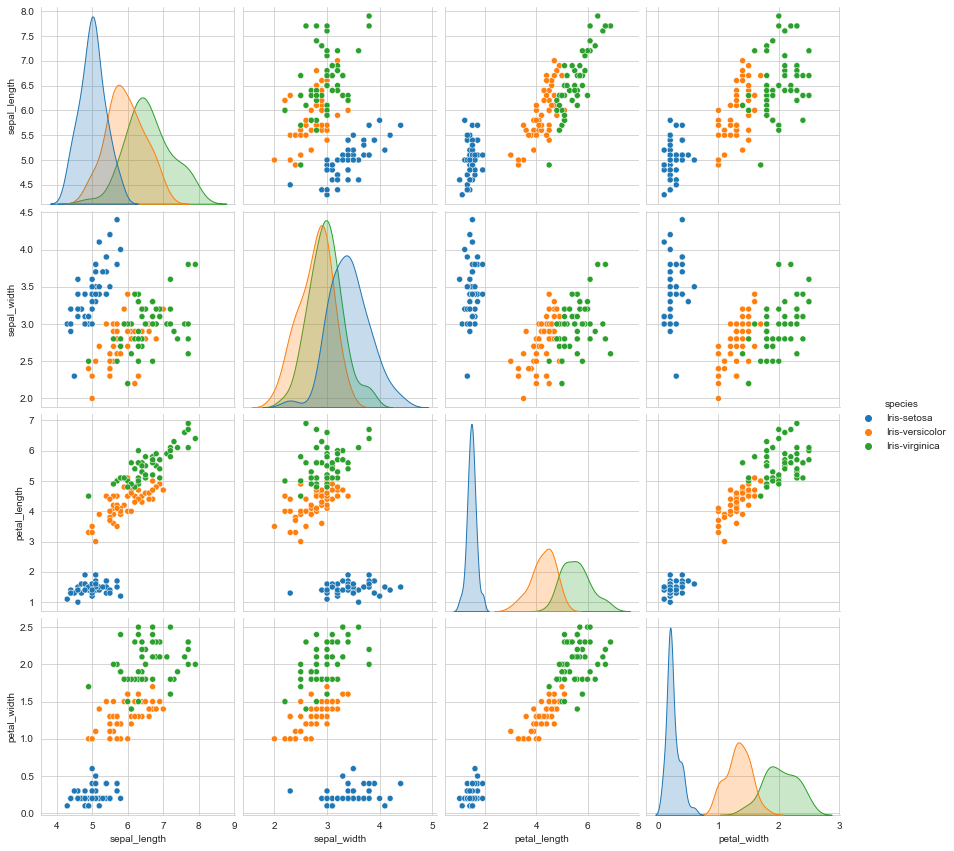

In [78]:
sns.pairplot(iris,hue="species",height=3)

<AxesSubplot:>

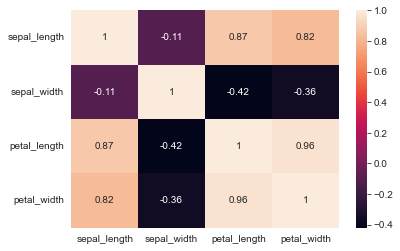

In [79]:
sns.heatmap(iris.corr(),annot=True)

<AxesSubplot:>

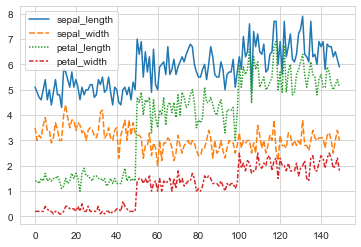

In [80]:
sns.lineplot(data=iris.drop(['species'],axis=1))

#### spliting the data into training and testing

In [81]:
##training the model
x=iris[['sepal_length','sepal_width','petal_length','petal_width']]
y=iris["species"]

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=5)

In [83]:
scaler=StandardScaler()
xtrain_scale=scaler.fit_transform(x_train)
xtest_scale=scaler.transform(x_test)

In [84]:
#model
log_model=LogisticRegression()
#model fitting
log_model.fit(x_train,y_train)

LogisticRegression()

In [85]:
# Prediction of y
ypred=log_model.predict(x_test)
ypred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [86]:
#Evaluation metrics
acc=accuracy_score(y_test,ypred)
acc

0.9777777777777777

In [87]:
# Logistic Algorithm..
log=LogisticRegression()

start_log=time.time()
log.fit(xtrain_scale,y_train)
end_log=time.time()

ytest_pred3=log.predict(xtest_scale)
acc_log=accuracy_score(y_test,ytest_pred3)*100

train_score_log=log.score(xtrain_scale,y_train)*100

print(log)
print("Train Accuracy :{:.5f}".format(train_score_log))
print("Test Accuracy :{:.5f}".format(acc_log))

LogisticRegression()
Train Accuracy :97.14286
Test Accuracy :93.33333


In [88]:
# Decision tree Algorithm..
dt=DecisionTreeClassifier()

start_dt=time.time()
dt.fit(xtrain_scale,y_train)
end_dt=time.time()

ytest_pred1=dt.predict(xtest_scale)
acc_dt=accuracy_score(y_test,ytest_pred1)*100

train_score_dt=dt.score(xtrain_scale,y_train)*100


print(dt)
print("Train Accuracy :{:.5f}".format(train_score_dt))
print("Test Accuracy :{:.5f}".format(acc_dt))
print("Training Time : {:.2f} seconds.".format(end_dt-start_dt))


DecisionTreeClassifier()
Train Accuracy :100.00000
Test Accuracy :95.55556
Training Time : 0.00 seconds.
